<a href="https://colab.research.google.com/github/byrocuy/REA-AI_Mastery/blob/main/week-3/session-2/08_gradient_descent_and_backpropagation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gradient Descend and Backpropagation

In the previous notebook, we have learned how to compute tangent lines at certain points. But what is it for?

In this notebook, we will learn how to use tangent lines to find the minimum of a function. This is called gradient descend. We will also learn how to use gradient descend to train a neural network. This is called backpropagation.

Let's say we have a quadratic equation:

$$f(x) = x^2 - 6x + 5$$

What is the minimum of this function?

Let's plot it first.

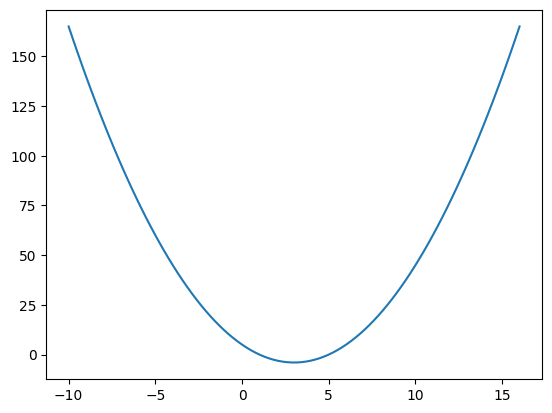

In [ ]:
# Plot x^2 - 6x + 5

import numpy as np
import matplotlib.pyplot as plt

# Plot the function
x = np.linspace(-10, 16, 100)
y = x**2 - 6*x + 5
plt.plot(x, y)
plt.show()

The minimum is at around $x = 3$, isn't it?

Let's try to find the exact minimum value using gradient descend.

If you observed the graph carefully, you will notice that the tangent line at the minimum point is horizontal. This means that the slope of the tangent line is zero.


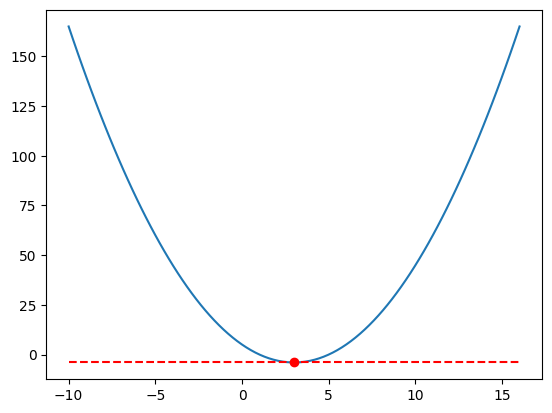

In [ ]:
# Plot x^2 - 6x + 5

import numpy as np
import matplotlib.pyplot as plt

# Plot the function
x = np.linspace(-10, 16, 100)
y = x**2 - 6*x + 5
plt.plot(x, y)

# Draw y = 6
y2 = [-4 for i in x]
plt.plot(x, y2, 'r--')

# Draw dot at x = 3
plt.plot(3, -4, 'ro')

plt.show()

The idea is:
- Start with a random value of $x$
- Compute the tangent line at that point
- Move $x$ to the left or right, depending on the slope of the tangent line
- Repeat until the slope is close to 0
- Done

Let's start with $x = 10$.

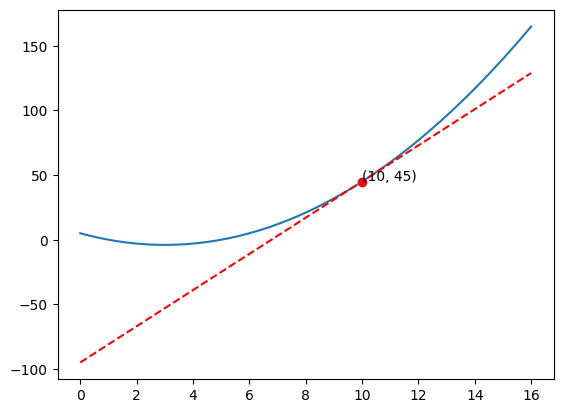

In [ ]:
# Plot x^2 - 6x + 5

import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**2 - 6*x + 5

def f_derivative(x):
    return 2*x - 6

# Plot the function
x = np.linspace(0, 16, 100)
y = x**2 - 6*x + 5
plt.plot(x, y)

# Draw tangent line at x = 10
x_0 = 10
y_0 = f(x_0)
tan = f_derivative(x_0)*(x - x_0) + y_0
plt.plot(x, tan, 'r--')

# Plot dot at x_0 and y_0
plt.scatter(x_0, y_0, c='r')
# add label (x, y)
plt.text(x_0, y_0+1, '({}, {})'.format(x_0, y_0))

plt.show()

The derivative of $f(x)$ is $f'(x) = 2x - 6$.

At $x = 10$, the slope of the tangent line is $f'(10) = 2(10) - 6 = 14$.

Now imagine the blue line as a hill, and we are standing at $x = 10$. The slope of the tangent line tells us the direction of the steepest uphill. So we should move to **the left**.

$$
x = x - \alpha f'(x) \\
$$

$\alpha$ is a small number, called the learning rate. It tells us how big the step should be. Let's say $\alpha = 0.1$.

And the operation is $-$ because we want to negate the slope (going down)

$$
x = x - 0.1 f'(x) \\
x = 10 - 0.1(14) \\
x = 8.6
$$

Now, let's plot again

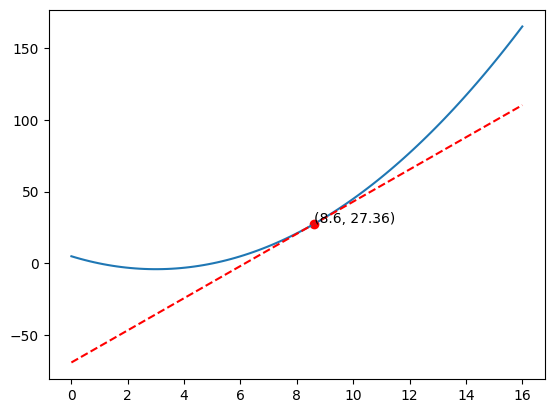

In [ ]:
# Plot x^2 - 6x + 5

import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**2 - 6*x + 5

def f_derivative(x):
    return 2*x - 6

# Plot the function
x = np.linspace(0, 16, 100)
y = x**2 - 6*x + 5
plt.plot(x, y)

# Draw tangent line at x = 10
x_0 = 8.6
y_0 = f(x_0)
tan = f_derivative(x_0)*(x - x_0) + y_0
plt.plot(x, tan, 'r--')

# Plot dot at x_0 and y_0
plt.scatter(x_0, y_0, c='r')
# add label (x, y)
plt.text(x_0, y_0+1, '({}, {})'.format(x_0, y_0))

plt.show()

It's getting closer to the minimum, isn't it?

Let's do it again.

$$
f'(x) = 2x - 6 \\
f'(8.6) = 2(8.6) - 6 = 11.2 \\
$$

$$
x = x - 0.1 f'(x) \\
x = 8.6 - 0.1(11.2) \\
x = 7.48
$$

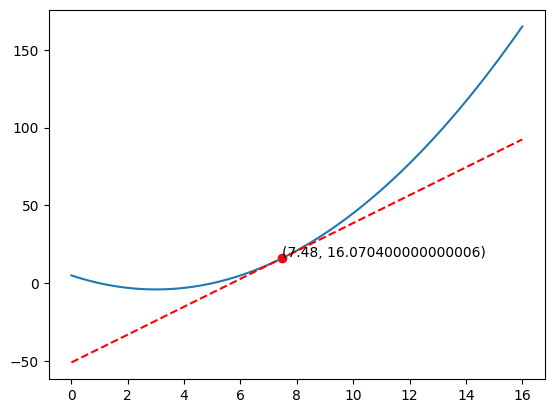

In [ ]:
# Plot x^2 - 6x + 5

import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**2 - 6*x + 5

def f_derivative(x):
    return 2*x - 6

# Plot the function
x = np.linspace(0, 16, 100)
y = x**2 - 6*x + 5
plt.plot(x, y)

# Draw tangent line at x = 10
x_0 = 7.48
y_0 = f(x_0)
tan = f_derivative(x_0)*(x - x_0) + y_0
plt.plot(x, tan, 'r--')

# Plot dot at x_0 and y_0
plt.scatter(x_0, y_0, c='r')
# add label (x, y)
plt.text(x_0, y_0+1, '({}, {})'.format(x_0, y_0))

plt.show()

If we keep doing this, we will eventually reach close to the minimum.

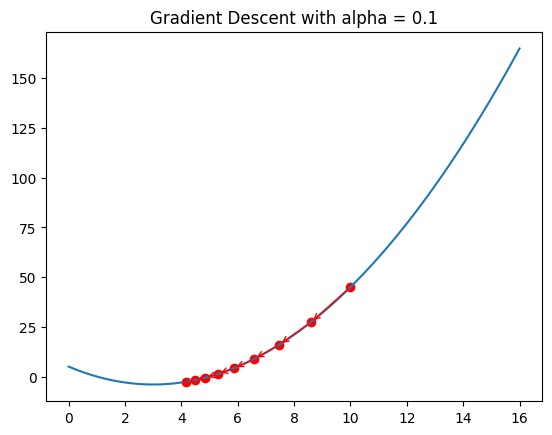

In [ ]:
# Plot x^2 - 6x + 5

import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**2 - 6*x + 5

def f_derivative(x):
    return 2*x - 6

# Plot the function
x = np.linspace(0, 16, 100)
y = x**2 - 6*x + 5
plt.plot(x, y)

x_0 = 10
y_0 = f(x_0)
alpha = 0.1
for i in range(9):
    plt.scatter(x_0, y_0, c='r')

    x_next = x_0 - alpha*f_derivative(x_0)
    y_next = f(x_next)

    # draw line with arrow from (x_0, y_0) to (x_next, y_next)
    plt.annotate('', xy=(x_next, y_next), xytext=(x_0, y_0), arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
                 va='center', ha='center')
    x_0 = x_next
    y_0 = y_next

plt.title('Gradient Descent with alpha = ' + str(alpha))
plt.show()

What if we change the learning rate to 0.01?

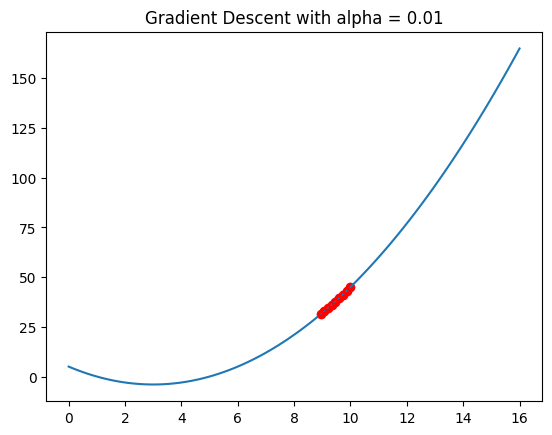

In [ ]:
# Plot x^2 - 6x + 5

import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**2 - 6*x + 5

def f_derivative(x):
    return 2*x - 6

# Plot the function
x = np.linspace(0, 16, 100)
y = x**2 - 6*x + 5
plt.plot(x, y)

x_0 = 10
y_0 = f(x_0)
alpha = 0.01
for i in range(9):
    plt.scatter(x_0, y_0, c='r')

    x_next = x_0 - alpha*f_derivative(x_0)
    y_next = f(x_next)

    # draw line with arrow from (x_0, y_0) to (x_next, y_next)
    plt.annotate('', xy=(x_next, y_next), xytext=(x_0, y_0), arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
                 va='center', ha='center')
    x_0 = x_next
    y_0 = y_next

plt.title('Gradient Descent with alpha = ' + str(alpha))
plt.show()

It learns slower! It's like climbing down a hill with smaller steps.

So why not just set the learning rate to high number? Isn't it supposed to be faster?

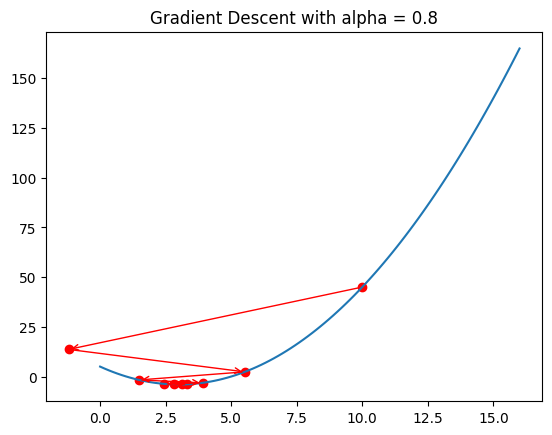

In [ ]:
# Plot x^2 - 6x + 5

import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**2 - 6*x + 5

def f_derivative(x):
    return 2*x - 6

# Plot the function
x = np.linspace(0, 16, 100)
y = x**2 - 6*x + 5
plt.plot(x, y)

x_0 = 10
y_0 = f(x_0)
alpha = 0.8
for i in range(9):
    plt.scatter(x_0, y_0, c='r')

    x_next = x_0 - alpha*f_derivative(x_0)
    y_next = f(x_next)

    # draw line with arrow from (x_0, y_0) to (x_next, y_next)
    plt.annotate('', xy=(x_next, y_next), xytext=(x_0, y_0), arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
                 va='center', ha='center')
    x_0 = x_next
    y_0 = y_next

plt.title('Gradient Descent with alpha = ' + str(alpha))
plt.show()

See, higher alpha means faster.

...doesn't it?

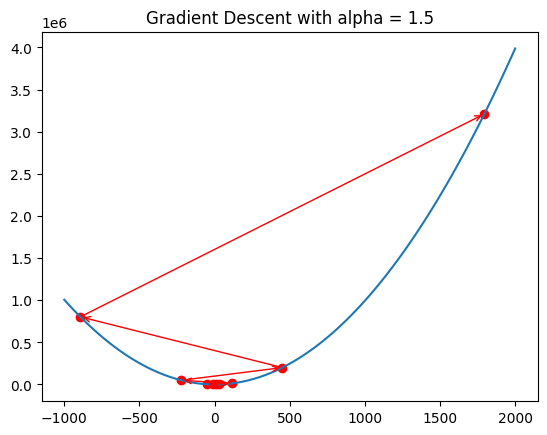

In [ ]:
# Plot x^2 - 6x + 5

import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**2 - 6*x + 5

def f_derivative(x):
    return 2*x - 6

# Plot the function
x = np.linspace(-1000, 2000, 100)
y = x**2 - 6*x + 5
plt.plot(x, y)

x_0 = 10
y_0 = f(x_0)
alpha = 1.5
for i in range(9):
    plt.scatter(x_0, y_0, c='r')

    x_next = x_0 - alpha*f_derivative(x_0)
    y_next = f(x_next)

    # draw line with arrow from (x_0, y_0) to (x_next, y_next)
    plt.annotate('', xy=(x_next, y_next), xytext=(x_0, y_0), arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
                 va='center', ha='center')
    x_0 = x_next
    y_0 = y_next

plt.title('Gradient Descent with alpha = ' + str(alpha))
plt.show()

It's too high! It's jumping around the minimum point. It will never reach the minimum.

So what is the best learning rate?

It's quite experimental. You have to try different values and see which one works best.

Some algorithms can automatically adjust the learning rate. It starts with a high learning rate, and then gradually decreases it as it gets closer to the minimum.

This is what gradient descend is.

In Neural Network, the main function is the loss function. We want to minimize the loss function. So we use gradient descend to find the minimum of the loss function.

Let's say we have a simple neural network with 1 input and 1 output

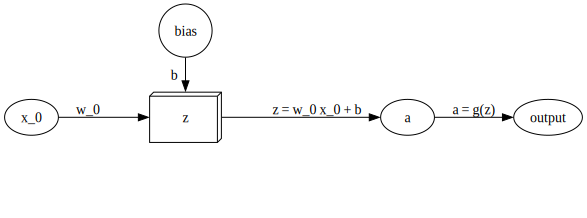

In [ ]:
from fastbook import *


# Draw neurons with multiple inputs and weights
gv('''
z[shape=box3d width=1 height=0.7]
bias[shape=circle width=0.3]
// Subgraph to force alignment on x-axis
subgraph {
    rank=same;
    z;
    bias;
    alignmentNode [style=invis, width=0]; // invisible node for alignment
    bias -> alignmentNode [style=invis]; // invisible edge
    z -> alignmentNode [style=invis]; // invisible edge
}
x_0->z [label="w_0"]
bias->z [label="b" pos="0,1.2!"]
z->a [label="z = w_0 x_0 + b"]
a->output [label="a = g(z)"]
''')


And the Cost Function is:

$$
C = (y - \hat{y})^2
$$

Let's plot the Cost Function.

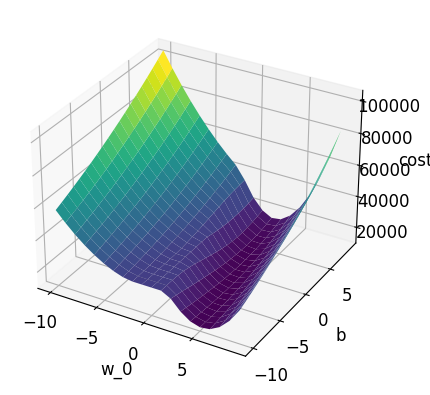

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create y = 3x + 1
x = np.linspace(-5, 8, 100)
relu = lambda x: np.maximum(0, x)


# set y = 3x + 1 with noise, random distribution
y = 3*x + 1 + np.random.normal(0, 10, 100)

# y = 3*x + 1 + np.random.normal(0, 10, 100)


# Initialize lists to store values of w_0, b, and cost
w_0_list = []
b_list = []
cost_list = []

# Loop over values of w_0 and b
for w_0 in range(-10, 10):
    for b in range(-10, 10):
        y_hat = relu(w_0*x + b)

        # Calculate cost function
        cost = np.sum((y_hat - y)**2)

        # Append values to lists
        w_0_list.append(w_0)
        b_list.append(b)
        cost_list.append(cost)

# Reshape cost_list into a 2D array
cost_array = np.array(cost_list).reshape((20, 20))

# Plot cost function in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('w_0')
ax.set_ylabel('b')
ax.set_zlabel('cost')
ax.plot_surface(np.array(w_0_list).reshape((20, 20)), np.array(b_list).reshape((20, 20)), cost_array, cmap='viridis')
plt.show()

The gradient descent algorithm should find the minimum of the Cost Function. It looks different from the previous example (2D), but the idea is the same.

## Backpropagation

In the previous example, how do we calculate the derivative of the Cost Function? We can use the chain rule. But before that, let's trace the flow of the data.

The input is $x$, and the output is $\hat{y}$.

The output is calculated by:

$$
z = w_0x + b \\
a = ReLU(z) \\
\hat{y} = a \\
C = (y - \hat{y})^2
$$

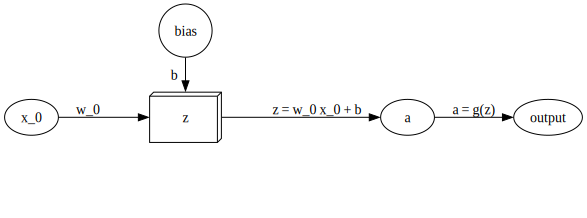

In [ ]:
from fastbook import *


# Draw neurons with multiple inputs and weights
gv('''
z[shape=box3d width=1 height=0.7]
bias[shape=circle width=0.3]
// Subgraph to force alignment on x-axis
subgraph {
    rank=same;
    z;
    bias;
    alignmentNode [style=invis, width=0]; // invisible node for alignment
    bias -> alignmentNode [style=invis]; // invisible edge
    z -> alignmentNode [style=invis]; // invisible edge
}
x_0->z [label="w_0"]
bias->z [label="b" pos="0,1.2!"]
z->a [label="z = w_0 x_0 + b"]
a->output [label="a = g(z)"]
''')


What we want to know is how much the Cost Function changes when we change $w_0$ and $b$:

- $\frac{dC}{dw_0}$
- $\frac{dC}{db}$


How do we calculate it?

It looks scary, but it's actually quite simple. It's just reversing the flow of the data.

Let's start with $\frac{dC}{dw_0}$.

$$
\frac{dC}{dw_0} = \frac{dC}{d\hat{y}} \frac{d\hat{y}}{da} \frac{da}{dz} \frac{dz}{dw_0} \\
$$


First, $\frac{dz}{dw_0}$.

$$
z = w_0x + b \\
\frac{dz}{dw_0} = x
$$

Next, $\frac{da}{dz}$.

$$
a = ReLU(z) \\
\frac{da}{dz} = \begin{cases}
1, & \text{if $z > 0$} \\
0, & \text{otherwise}
\end{cases}
$$

Next, $\frac{d\hat{y}}{da}$.

$$
\hat{y} = a \\
\frac{d\hat{y}}{da} = 1
$$

Finally, $\frac{dC}{d\hat{y}}$.

$$
C = (y - \hat{y})^2 \\
\frac{dC}{d\hat{y}} = \frac{d(y^2 - 2y\hat{y} + \hat{y}^2)}{d\hat{y}} = -2y + 2\hat{y}  = 2(\hat{y} - y)
$$


Now, let's find out how much the Cost Function changes when we change $b$: $\frac{dC}{db}$.

$$
\frac{dC}{db} = \frac{dC}{d\hat{y}} \frac{d\hat{y}}{da} \frac{da}{dz} \frac{dz}{db} \\
$$

$\frac{dC}{d\hat{y}}$, $\frac{d\hat{y}}{da}$, and $\frac{da}{dz}$ are the same as before.

We just need to find $\frac{dz}{db}$.

$$
z = w_0x + b \\
\frac{dz}{db} = 1
$$

That's it!



For easier understanding, let's simulate it in Google Sheet: [here](https://docs.google.com/spreadsheets/d/15JWbRFB4k5CNcfD-2hduHHssXIc1SGhNVSpu_30wVAw/edit#gid=333844254)